# `Personal Loan - Campaign - Analysis`


## `Domain: `
Banking


## `Data Description: `
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## `Context: `
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.


## `Objective:`
The classification goal is to predict the likelihood of a liability customer buying personal loans.


## `Attributes Information:`

* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (1000 Dollor)
* ZIP Code: Home Address ZIP code.
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (1000 Dollor Per Month)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. ($000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?



----------------------

## `Index`

----------------------
- <a href = #link1>Import Libraries and Load Dataset </a>


- <a href = #link2>Univariate Analysis & Bivariate Analysis</a> 


- <a href = #link5>Null Values & Special Treatment</a> 


- <a href = #link6>Model building using Logistic Regression from Sklearn</a>


- <a href = #link7>Improving Model Performance via Checking Parameters of Logistic Regression</a>


- <a href = #link9>Visualizing Confusion Matrix using Heatmap</a>


- <a href = #link8>Business Insights</a>


## <a id = "link1"></a> Import Libraries and Load Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score,accuracy_score


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cdata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
cdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
cdata.shape

(5000, 14)

In [4]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Table Observation:**

* 5000 recors with 14 attributes - enough/large data to build a quality model 
* From the data I understand we have few key attributes provide to fit the model for the Personal Loan campaign.
* ID is the attributes not input values for the model, need to check if its unique for each records.
- All attributes are Integer or float which is very good for building model 
- No Object or date involved.
- Table has 5000 rows and 13 columns of data.
- No null or missing records to work on it and its a complete table

In [5]:
#5 Point Summary
cdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observation:**

- ID 5000 unique records starts from 1 to 5000 shows that it can be droped.
- Age starts from 23 to 67 with mean 45.33, age seems balanced.
- Experiance -3 which needs to be treated which has max 43 years of experiance.
- ZIP Code - need to check how this will add values to the model 
- Mortgage which has more than 50% 0 records which need to be treated
- All other attibutes should be taken for building model.
- Outliers observed in the income column and right skewed.
- More than 75% people spend less than or equal to 2.50 using using credit card.
- More than 50% of the people in the given dataset have education more than 2.
- More than 75% of people haven't opted for Personal Loan, Securities Account and CD Account.
- More than 50% of people have opted for Online.
- Only 25% of people have opted for CreditCard.

# <a id = "link2"></a> Univariate and Bivariate

In [6]:
# Number of unique in each column?
cdata.nunique() 

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
cdata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# NO OF ZEROS
k = cdata[:][cdata[:] == 0].count()
k

ID                       0
Age                      0
Experience              66
Income                   0
ZIP Code                 0
Family                   0
CCAvg                  106
Education                0
Mortgage              3462
Personal Loan         4520
Securities Account    4478
CD Account            4698
Online                2016
CreditCard            3530
dtype: int64

In [9]:
##Value counts of all categorical columns.
# TO FIND THE UNIQUE RECORDS + SORTED
for i in ['Age', 'Experience', 'Income','CCAvg','Mortgage']:
    k=cdata[i].unique()
    k.sort()
    print(i,k,'\n')

Age [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67] 

Experience [-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43] 

Income [  8   9  10  11  12  13  14  15  18  19  20  21  22  23  24  25  28  29
  30  31  32  33  34  35  38  39  40  41  42  43  44  45  48  49  50  51
  52  53  54  55  58  59  60  61  62  63  64  65  68  69  70  71  72  73
  74  75  78  79  80  81  82  83  84  85  88  89  90  91  92  93  94  95
  98  99 100 101 102 103 104 105 108 109 110 111 112 113 114 115 118 119
 120 121 122 123 124 125 128 129 130 131 132 133 134 135 138 139 140 141
 142 143 144 145 148 149 150 151 152 153 154 155 158 159 160 161 162 163
 164 165 168 169 170 171 172 173 174 175 178 179 180 181 182 183 184 185
 188 189 190 191 192 193 194 195 198 199 200 201 202 203 204 205 218 224] 

CCAvg [ 0.    0.1   0.2   0.3   

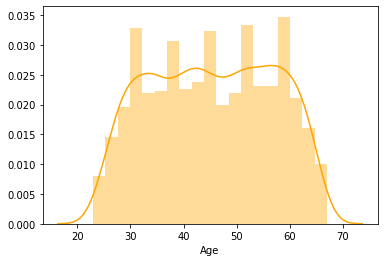

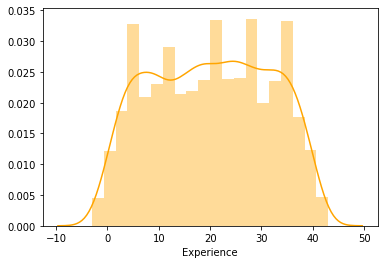

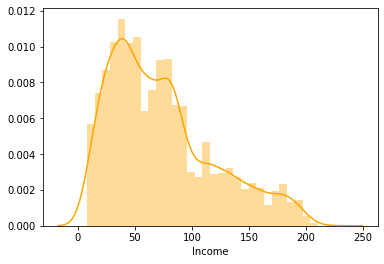

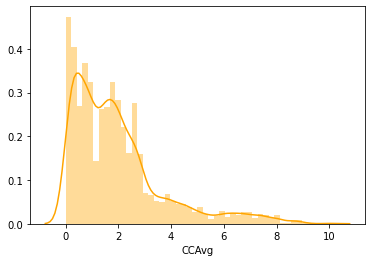

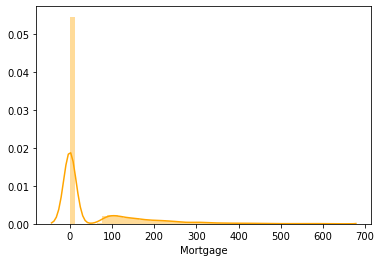

In [58]:
# Distplot for continous columns
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    sns.distplot(cdata[i], kde=True, color='Orange')
    plt.show()

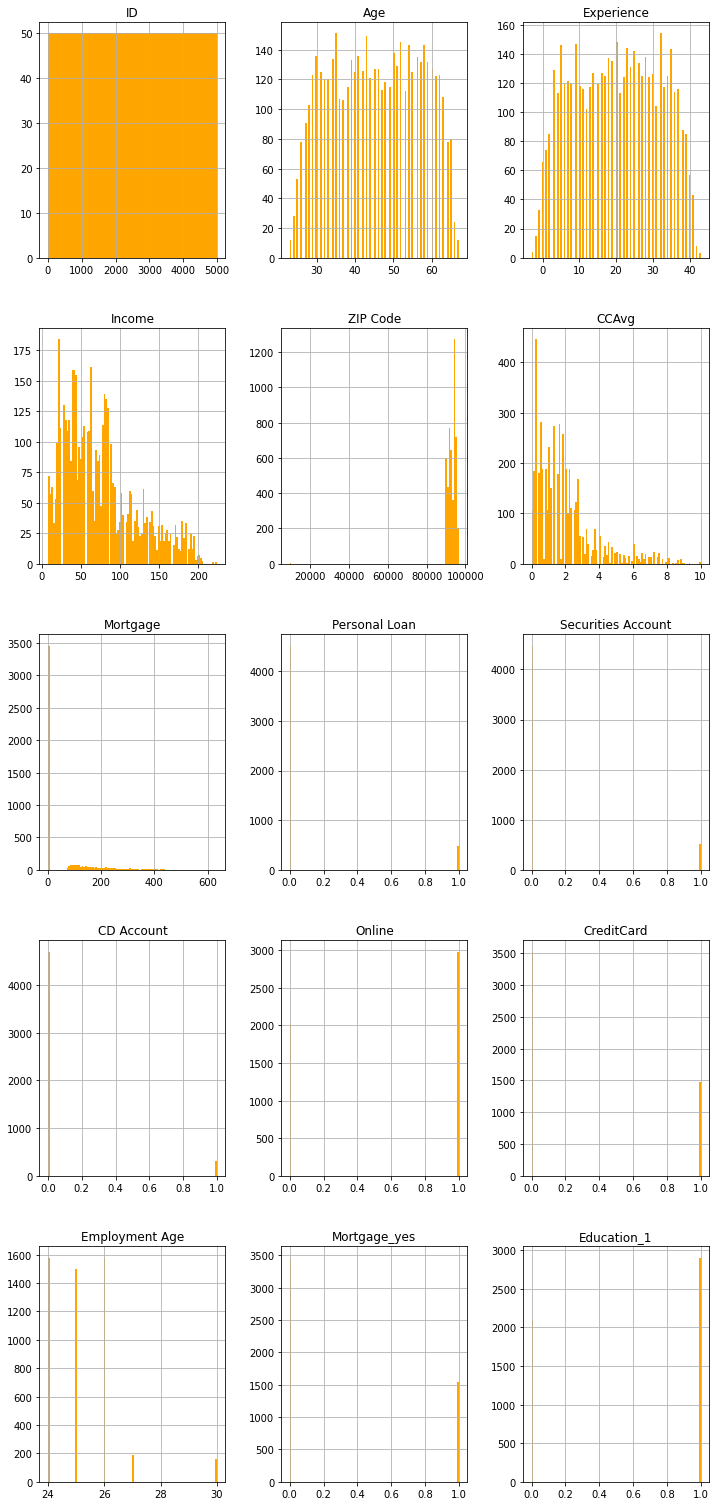

In [59]:
columns = list(cdata)[:]
cdata[columns].hist(stacked=False, bins=100, figsize=(12,55), layout=(10,3), color='Orange'); 

In [75]:
##Number of people with zero mortgage?
cdata[cdata['Mortgage'] ==0].count()

ID                    3462
Age                   3462
Experience            3462
Income                3462
ZIP Code              3462
Family                3462
CCAvg                 3462
Education             3462
Mortgage              3462
Personal Loan         3462
Securities Account    3462
CD Account            3462
Online                3462
CreditCard            3462
Employment Age        3462
Mortgage_yes          3462
Family_2              3462
Education_1           3462
dtype: int64

In [13]:
((cdata['ZIP Code']).value_counts(normalize=True)).max()

0.0338

In [14]:
##Number of people with credit card with the bank?
cdata['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [15]:
## Number of people with zero credit card spending per month?
cdata[cdata['CCAvg'] == 0].count()

ID                    106
Age                   106
Experience            106
Income                106
ZIP Code              106
Family                106
CCAvg                 106
Education             106
Mortgage              106
Personal Loan         106
Securities Account    106
CD Account            106
Online                106
CreditCard            106
dtype: int64

In [4]:
## Credit Card 0 has average credit card spending???
cdata.groupby(['CreditCard'])['CCAvg'].value_counts()

CreditCard  CCAvg
0           0.3      172
            1.0      164
            0.2      139
            2.0      136
            0.8      132
                    ... 
1           6.2        1
            6.8        1
            8.2        1
            8.3        1
            10.0       1
Name: CCAvg, Length: 200, dtype: int64

0    90.4
1     9.6
Name: Personal Loan, dtype: float64



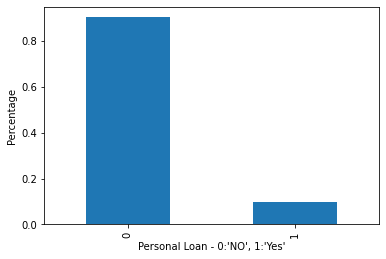

In [5]:
print(cdata['Personal Loan'].value_counts(normalize=True)*100)
print()
cdata['Personal Loan'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Personal Loan - 0:'NO', 1:'Yes'")
plt.ylabel("Percentage")
plt.show()

In [17]:
##Value counts of all categorical columns.
for i in ['Family','Education','Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard']:
    k = cdata[i].value_counts()
    print(i,'\n',k,'\n')

Family 
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64 

Education 
 1    2096
3    1501
2    1403
Name: Education, dtype: int64 

Personal Loan 
 0    4520
1     480
Name: Personal Loan, dtype: int64 

Securities Account 
 0    4478
1     522
Name: Securities Account, dtype: int64 

CD Account 
 0    4698
1     302
Name: CD Account, dtype: int64 

Online 
 1    2984
0    2016
Name: Online, dtype: int64 

CreditCard 
 0    3530
1    1470
Name: CreditCard, dtype: int64 



**Observation:**

- No null records to be treated.
- Experience -3, -2, and -1 require special treatment
- Mortgage - is biased - more than 69% data is 0 - which needs to be treated
- people with zero credit card spending per month?
- This is Thera bank records and Credit Card 0 has average credit card spending is misleading **INCORRECT IMPUTATION**. I assume CCAvg being observed from other bank's credit card 
- No outlier to be treated


In [18]:
##Value counts of all categorical columns.
for i in ['Family','Education','Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard']:
    k = cdata[i].value_counts(normalize=True)
    print(i,'\n',k,'\n')

Family 
 1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64 

Education 
 1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64 

Personal Loan 
 0    0.904
1    0.096
Name: Personal Loan, dtype: float64 

Securities Account 
 0    0.8956
1    0.1044
Name: Securities Account, dtype: float64 

CD Account 
 0    0.9396
1    0.0604
Name: CD Account, dtype: float64 

Online 
 1    0.5968
0    0.4032
Name: Online, dtype: float64 

CreditCard 
 0    0.706
1    0.294
Name: CreditCard, dtype: float64 



In [19]:
# ##Value counts of all categorical columns.
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    k=cdata[i].value_counts(normalize=True)
    print('\n',i,'\n', k,'\n')


 Age 
 35    0.0302
43    0.0298
52    0.0290
58    0.0286
54    0.0286
50    0.0276
41    0.0272
30    0.0272
56    0.0270
34    0.0268
39    0.0266
59    0.0264
57    0.0264
51    0.0258
60    0.0254
45    0.0254
46    0.0254
42    0.0252
40    0.0250
31    0.0250
55    0.0250
62    0.0246
29    0.0246
61    0.0244
44    0.0242
32    0.0240
33    0.0240
48    0.0236
38    0.0230
49    0.0230
47    0.0226
53    0.0224
63    0.0216
36    0.0214
37    0.0212
28    0.0206
27    0.0182
65    0.0160
64    0.0156
26    0.0156
25    0.0106
24    0.0056
66    0.0048
23    0.0024
67    0.0024
Name: Age, dtype: float64 


 Experience 
  32    0.0308
 20    0.0296
 9     0.0294
 5     0.0292
 23    0.0288
 35    0.0286
 25    0.0284
 28    0.0276
 18    0.0274
 19    0.0270
 26    0.0268
 24    0.0262
 3     0.0258
 14    0.0254
 16    0.0254
 30    0.0252
 34    0.0250
 27    0.0250
 17    0.0250
 29    0.0248
 22    0.0248
 7     0.0242
 8     0.0238
 6     0.0238
 15    0.0238
 10    0.0236


In [20]:
cdata.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [21]:
for i in ['Experience','Family','Education','Securities Account','CD Account','Online','CreditCard']:
    print(pd.crosstab(cdata[i],cdata['Personal Loan'], normalize='index'),'\n')

Personal Loan         0         1
Experience                       
-3             1.000000  0.000000
-2             1.000000  0.000000
-1             1.000000  0.000000
 0             0.893939  0.106061
 1             0.891892  0.108108
 2             0.894118  0.105882
 3             0.868217  0.131783
 4             0.920354  0.079646
 5             0.904110  0.095890
 6             0.899160  0.100840
 7             0.900826  0.099174
 8             0.848739  0.151261
 9             0.863946  0.136054
 10            0.940678  0.059322
 11            0.887931  0.112069
 12            0.843137  0.156863
 13            0.905983  0.094017
 14            0.952756  0.047244
 15            0.957983  0.042017
 16            0.897638  0.102362
 17            0.912000  0.088000
 18            0.912409  0.087591
 19            0.896296  0.103704
 20            0.885135  0.114865
 21            0.902655  0.097345
 22            0.895161  0.104839
 23            0.909722  0.090278
 24           

**Observation:**

- `There is no imbalance in the data to be treated for the categorical variables`

## <a id = "link5"></a> Null Values & Special Treatment

In [9]:
cdata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

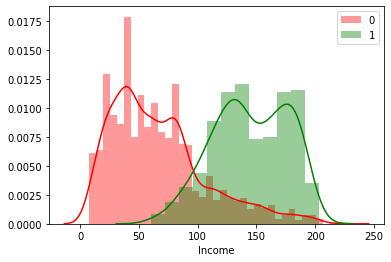

In [11]:
sns.distplot(cdata[cdata['Personal Loan']==0]['Income'],color='r',label=0)
sns.distplot(cdata[cdata['Personal Loan']==1]['Income'],color='g',label=1)
plt.legend()
plt.show()

# Number of People with high income taking personal loan are high as compared to low income

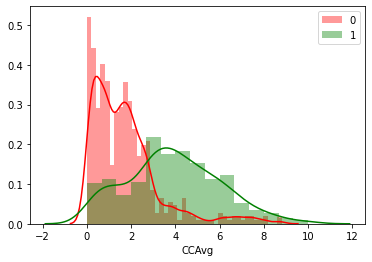

In [12]:
sns.distplot(cdata[cdata['Personal Loan']==0]['CCAvg'],color='r',label=0)
sns.distplot(cdata[cdata['Personal Loan']==1]['CCAvg'],color='g',label=1)
plt.legend()
plt.show()


In [13]:
cdata['Employment Age'] = cdata['Age'] - cdata['Experience']
cdata['Employment Age'].describe()

count    5000.000000
mean       25.233800
std         1.233305
min        24.000000
25%        24.000000
50%        25.000000
75%        26.000000
max        30.000000
Name: Employment Age, dtype: float64

In [24]:
# NEED TO CHECK EXPERIENCE ANOMALIES
ExpTest = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
ExpTest[ExpTest['Experience'] <= 0].groupby('Experience')['Experience'].count() 

Experience
-3     4
-2    15
-1    33
 0    66
Name: Experience, dtype: int64

In [25]:
# NEED TO CHECK -1 RECORD, WHETHER ITS VALID
k = cdata[cdata['Experience'] == -1]
k.sort_values(by='Age', ascending=True)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Employment Age
2430,2431,23,-1,73,92120,4,2.60,1,0,0,0,0,1,0,24
3157,3158,23,-1,13,94720,4,1.00,1,84,0,0,0,1,0,24
909,910,23,-1,149,91709,1,6.33,1,305,0,0,0,0,1,24
3425,3426,23,-1,12,91605,4,1.00,1,90,0,0,0,1,0,24
3824,3825,23,-1,12,95064,4,1.00,1,0,0,1,0,0,1,24
670,671,23,-1,61,92374,4,2.60,1,239,0,0,0,1,0,24
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0,25
686,687,24,-1,38,92612,4,0.60,2,0,0,0,0,1,0,25
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0,25
1173,1174,24,-1,35,94305,2,1.70,2,0,0,0,0,0,0,25


In [26]:
# NEED TO CHECK -2 RECORD, WHETHER ITS VALID
k = cdata[cdata['Experience'] == -2]
k.sort_values(by='Age', ascending=True)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Employment Age
2717,2718,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1,25
2962,2963,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0,25
3130,3131,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1,25
4411,4412,23,-2,75,90291,2,1.80,2,0,0,0,0,1,1,25
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0,26
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1,26
793,794,24,-2,150,94720,2,2.00,1,0,0,0,0,1,0,26
889,890,24,-2,82,91103,2,1.60,3,0,0,0,0,1,1,26
2466,2467,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0,26
2876,2877,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0,26


In [27]:
# NEED TO CHECK -3 RECORD, WHETHER ITS VALID
k = cdata[cdata['Experience'] == -3]
k.sort_values(by='Age', ascending=True)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Employment Age
2618,2619,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0,26
4285,4286,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0,26
3626,3627,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0,27
4514,4515,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0,27


In [28]:
# TREATING EXPERIENCE -1,-2 & -3 AS 0
cdata['Experience'].replace([-1, -2, -3],0,True)

In [6]:
cdata[cdata['Experience'] <= 0].groupby('Experience')['Experience'].count() 

Experience
-3     4
-2    15
-1    33
 0    66
Name: Experience, dtype: int64

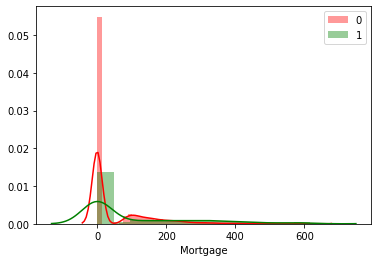

In [8]:
sns.distplot(cdata[cdata['Personal Loan']==0]['Mortgage'],color='r',label=0)
sns.distplot(cdata[cdata['Personal Loan']==1]['Mortgage'],color='g',label=1)
plt.legend()
plt.show()

# Most people with zero motgage are not taking personal loans

In [30]:
((cdata['Mortgage']).value_counts(normalize=True)).max()

0.6924

In [15]:
#CREATING MORTGAGE_YES 0 IS 0 AND >0 IS 1
cdata['Mortgage_yes'] = cdata['Mortgage']
cdata.loc[cdata['Mortgage_yes'] > 0, 'Mortgage_yes'] = 1
cdata['Mortgage_yes'].value_counts()

0    3462
1    1538
Name: Mortgage_yes, dtype: int64

In [33]:
#FAMILY > 2 HAS HIGHER CORRELATED COMPARING < 0 
pd.crosstab(cdata['Family'],cdata['Personal Loan'], normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


In [34]:
# CREATING FAMILY_2 if x > 2 else 0
cdata['Family_2'] = cdata['Family']
cdata['Family_2'] = cdata['Family_2'].apply(lambda x : 1 if x > 2 else 0)
cdata['Family_2'].value_counts()

0    2768
1    2232
Name: Family_2, dtype: int64

In [35]:
#Education > 1 HAS HIGHER CORRELATED COMPARING = 1 
pd.crosstab(cdata['Education'],cdata['Personal Loan'], normalize='index')

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


In [17]:
# CREATING Education_1 is 1 if x > 1 else 0
cdata['Education_1'] = cdata['Education']
cdata['Education_1'] = cdata['Education_1'].apply(lambda x : 1 if x > 1 else 0)
cdata['Education_1'].value_counts()

1    2904
0    2096
Name: Education_1, dtype: int64

**Data Treatment**

- There could not be negative experiences and while investigation found that their age were below mean so replace it with mean
- Creating Mortgage_yes variable from Mortgage to test & improve the correlation
- Creating Family_2 variable from Family to test & improve the correlation
- Creating Education_1 variable from Education to test & improve the correlation

## Personal Loan

In [37]:
# % PERSONAL LOAN OPTED
T = len(cdata.loc[cdata['Personal Loan'] == True])
F = len(cdata.loc[cdata['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(T, (T / (T + F)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(F, (F / (T + F)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


<AxesSubplot:>

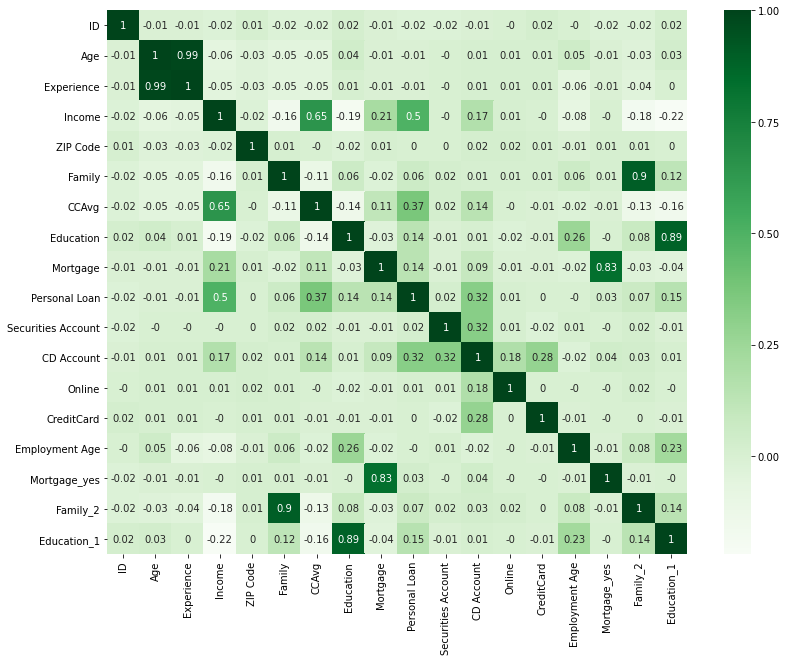

In [39]:
plt.figure (figsize = (13,10))
c = cdata.corr().round(2)
sns.heatmap(c, annot=True,cmap='Greens')

**Observation Considering Personal Loan**

- 9.6% opted for a personal loan, confirmed
- Age & Experience both variable negative correlated
- Income and CCAvg have some biased
- Personal Loan correlated to Age, Experience, Family, Income, Securities Account, online, CreditCard
- Experience Negative correlation. 
- Income Highly positive correlation 
- Family negative correlation.
- CCAvg Fairly psitive correlation 
- Mortgage & Education slightly positve correlation 
- SecuritiesAccount Positive correlation.
- CDAccount, Online, Credit Card Positive correlation (more than 0.31)
- Mortgage_yes less correlation comparing Mortgage
- Family_2 (Family > 2) has higher correlation comparing Family
- Education_1 (Education > 1) has higher correlation comparing Education

In [40]:
#Drawing relationship between Loan_Status, Gender, Property_Area, Married

cdata.groupby(['Securities Account','CD Account','Online', 'CreditCard'])['Personal Loan'].value_counts()

Securities Account  CD Account  Online  CreditCard  Personal Loan
0                   0           0       0           0                1168
                                                    1                 116
                                        1           0                 477
                                                    1                  50
                                1       0           0                1689
                                                    1                 165
                                        1           0                 658
                    1           0       1           1                   4
                                1       0           1                  13
                                        1           1                  72
                                                    0                  66
1                   0           0       0           0                 132
                                              

In [41]:
#Drawing relationship between Loan_Status, Gender, Property_Area, Married

cdata.groupby(['Family','Securities Account','CD Account','Online','CreditCard'])['Personal Loan'].value_counts()

Family  Securities Account  CD Account  Online  CreditCard  Personal Loan
1       0                   0           0       0           0                365
                                                            1                 20
                                                1           0                141
                                                            1                  9
                                        1       0           0                533
                                                                            ... 
4       1                   1           0       1           0                  1
                                        1       0           1                  6
                                                            0                  4
                                                1           0                 15
                                                            1                  3
Name: Personal Loan, Length: 83, dt

In [42]:
# PERSONAL LOAN ANALYSIS
cdata.groupby(["Personal Loan"]).mean().T.round(2)

Personal Loan,0,1
ID,2512.17,2390.65
Age,45.37,45.07
Experience,20.15,19.84
Income,66.24,144.75
ZIP Code,93152.43,93153.20
Family,2.37,2.61
CCAvg,1.73,3.91
Education,1.84,2.23
Mortgage,51.79,100.85
Securities Account,0.10,0.12


**Observation:**
- `Securities Account, CD Account, Online customers have have high correlation (Biased) to get Personal Loan approved`

## <a id = "link6"></a> Model building using Logistic Regression from Sklearn 

In [23]:
cdata['Family'] = cdata['Family'].astype('category')
cdata['Education'] = cdata['Education'].astype('category')

In [28]:
## DEFINE X and Y 
## REMOVING 'Family','Mortgage_yes','Education' to avoid multicollinearity 
X = cdata.drop(['Personal Loan','ID','ZIP Code','Mortgage_yes','Employment Age', 'Education_1'], axis=1)
y = cdata[['Personal Loan']]
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [29]:
#Test for Dummies - There is no change
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,1,49,1.6,0,1,0,0,0,0,0,1,0,0
1,45,19,34,1.5,0,1,0,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,1,0,0,1,1,0


**Observation**

- No dummy variables to be treated

In [30]:
# SPLIT THE TABLE INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=7)

In [31]:
#CHECK TRAIN & TEST
print(len(X_train), "({0:0.2f}%) data is in training set".format((len(X_train)/len(cdata.index)) * 100))
print(len(X_test), "({0:0.2f}%) data is in test set".format((len(X_test)/len(cdata.index)) * 100))

3500 (70.00%) data is in training set
1500 (30.00%) data is in test set


In [32]:
#PERSONAL LOAN COUNT & %

#Original
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(cdata.loc[cdata['Personal Loan'] == 1]), (len(cdata.loc[cdata['Personal Loan'] == 1])/len(cdata.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(cdata.loc[cdata['Personal Loan'] == 0]), (len(cdata.loc[cdata['Personal Loan'] == 0])/len(cdata.index)) * 100))
print("")

#Training
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")

#Testing
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 3500 (100.00%)
Training Personal Loan False Values   : 3500 (100.00%)

Test Personal Loan True Values        : 1500 (100.00%)
Test Personal Loan False Values       : 1500 (100.00%)



## Logistic Regression Performance: 

In [33]:
# FIT THE MODELON TRIN DATA
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=7)
lr.fit(X_train, y_train)                    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# PREDICTING THE TARGET VARIABLE ON TEST
y_predict = lr.predict(X_test)              

In [35]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Observed Loan Status,Predicted Loan Status
3406,42,12,34,2.0,0,0,0,0,1,0,1,0,0,1,0,0
757,52,28,81,1.8,0,1,0,0,0,0,1,0,1,0,0,0
3624,58,28,70,1.4,0,0,0,0,0,0,0,0,0,1,0,0
4544,28,4,80,2.5,0,0,0,1,0,0,1,0,0,0,0,0
3235,60,35,39,1.6,0,0,0,1,0,1,0,0,0,1,0,0


In [36]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1])
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

Trainig accuracy 0.958

Testing accuracy 0.9653333333333334

Confusion Matrix


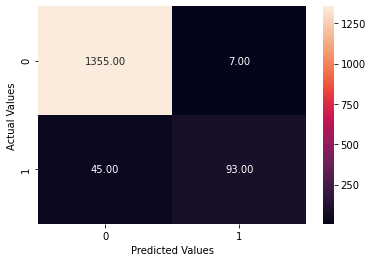

None

Recall: 0.6739130434782609

Precision: 0.93

F1 Score: 0.7815126050420169

Roc Auc Score: 0.8343867713720232


In [37]:
print("Trainig accuracy",lr.score(X_train,y_train))  
print()
print("Testing accuracy",lr.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

## Need to test the parameter

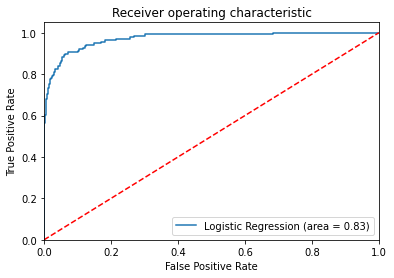

In [38]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## <a id = "link7"></a> Improving Model Performance by Checking Parameters of Logistic Regression

In [39]:
# Checking Parameters of logistic regression
lr.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [40]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.958, 0.958, 0.958, 0.901, 0.903]

[0.964, 0.964, 0.964, 0.912, 0.915]


In [41]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.959, 0.903]

[0.965, 0.915]


**Observation:**
- `Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'`
- `liblinear` is choosen

In [42]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') 
# changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.8997142857142857

Testing accuracy 0.9086666666666666


**Observation:**
- `Testing accuracy increased and model is not overfit anymore so adding class weight from the model`
- `There is not much different in Trining and Testing accuracy so the model is not overfit model`
- `The model score and accuracy is good so its not underfit model as well`

In [43]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.851, 0.895, 0.897, 0.901, 0.9, 0.9]

[0.86, 0.904, 0.906, 0.907, 0.908, 0.909]


In [44]:
# Running a loop to check different values of 'max_iter'

train_score=[]                                 
test_score=[]
max_iter = [100,200,500,1000,1000]
for i in max_iter:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=0.5, max_iter=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(max_iter)
print()
print(train_score)
print()
print(test_score)

[100, 200, 500, 1000, 1000]

[0.901, 0.901, 0.901, 0.901, 0.901]

[0.907, 0.907, 0.907, 0.907, 0.907]


In [45]:
# Running a loop to check different values of 'verbose'

train_score=[]                                 
test_score=[]
verbose = [0,1,2,3,4,5,6,7,8,9,10,100,1000]
for i in verbose:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=0.5, max_iter=100, verbose=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(verbose)
print()
print(train_score)
print()
print(test_score)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]

[0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901, 0.901]

[0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907, 0.907]


**Observation:**
- `Best testing accuracy is obtained for C=0.5,0.75 & 1`

### Conclusion on Model Selection: </a>

Based on all the above observations, the model chosen is as follows:
- Solver = liblinear. No significant differences in scores found when compared the scores of the shortlisted solvers. However, the definition of ***LogisticRegression function in Python*** suggests that for smaller datasets, **liblinear is a good choice. Considering these two factors, liblinear is chosen**.
- **C=1. anthing > 0.5 provides the best score for all solvers, including liblinear, which is our choice of solver**.
- Penalty= l1. **liblinear showed better scores with l1 than l2**.
- Class_weighted = None
- max_iter - gives all same score for both train and test - **decided to choose default = 100**
- random_state - **decided to maintain same value as 42**
- Dual, default is False - **decided to choose Default False**
- fit_intercept, default=True - **decided to choose  Default True**
- class_weight, default=None - **decided to choose  Default None**
- multi_class - **liblinear does not support multi-class so ignoring.**
- warm_start - default is False - **decided to choose Default False**
- verbose - [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000] giving same values so **decided to use default=0**

In [46]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight=None ,C=0.5) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

#  <a id = "link9"></a> Visualizing Confusion Matrix using Heatmap

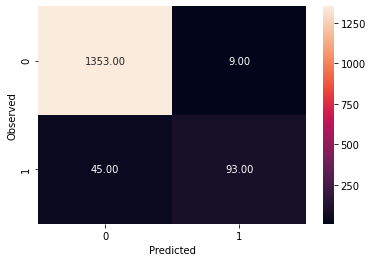

In [52]:

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    
draw_cm(y_test,y_predict)

In [53]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1        2         3         4         5        6  \
0 -0.324837  0.327362  0.05341  0.166437  0.000882 -0.361706  2.76147   

          7         8         9        10        11        12        13  \
0 -0.521999 -0.737077 -0.136364  1.664168  1.551877  3.268085  3.546787   

   intercept  
0  -2.999982  


In [54]:
model_score = model.score(X_test, y_test)
print("Model Score:       ", model_score)
print("Recall:            ",recall_score(y_test,y_predict))
print("Precision:         ",precision_score(y_test,y_predict))
print("F1 Score:          ",f1_score(y_test,y_predict))
print("Roc Auc Score:     ",roc_auc_score(y_test,y_predict))

Model Score:        0.964
Recall:             0.6739130434782609
Precision:          0.9117647058823529
F1 Score:           0.775
Roc Auc Score:      0.833652556981421


**Observation**

**classification rate of 91%, considered as very good accuracy.**

**Precision:** 

*Precision is about being precise, i.e., how accurate your model is. **The Logistic Regression model predicted customer are going to opt Personal Loan**, that customers have 91% of the time.

**Recall:**

*Type 1 & Type II Error - Logistic Regression model can identify it 68% of the time.

**ROC Curve**

*Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. 
*AUC score for the case is 0.83. 


## <a id = "link8"></a>Business Insight

In [55]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.119869
         Iterations 9


In [56]:
#logistic regression - Summary
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                  0.6254
Time:                        23:17:53   Log-Likelihood:                -419.54
converged:                       True   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                9.252e-291
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.3221      2.120     -5.340      0.000     -15.478      -7.166
Age                   -0.0458      0.079     -0.578      0.563      -0.201       0.109
Experience          

### Interpretation of Pseudo R^2

A pseudo R^2 of 62% indicates that 62% of the uncertainty of the intercept only model is explained by the full model

#### odds ratio=exp(coef)

#### probability = odds / (1+odds)

In [57]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [66]:
# For p-value (pval <0.1) and ordered by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_1,3.83,46.01,0.98,0.00
CD Account,3.45,31.49,0.97,0.00
Family_2,1.93,6.87,0.87,0.00
CCAvg,0.20,1.22,0.55,0.00
Income,0.06,1.06,0.51,0.00
Online,-0.65,0.52,0.34,0.00
Securities Account,-0.69,0.50,0.33,0.05
CreditCard,-0.93,0.39,0.28,0.00
const,-11.84,0.00,0.00,0.00


# Business Insight

**Assumption**

* This is Thera bank records and Credit Card 0 has average credit card spending is misleading **INCORRECT IMPUTATION**. I assume average credit card spending being observed from other bank's credit card 

**Observation:**

- Education_1, CD Account, Family_2, CCAvg, Income, Online, Securities Account, CreditCard has less P values can be considered
- Education_1, CD Account, Family_2, CCAVg has higher probability to get the Personal Loan
- Online, Securities Account, CreditCard Surprisingly have negatively correlated to Personal Loan with least probability
- Mortgage has higher p-Value.


## Business Understanding:

`The following are the understanding by the given data`

* Education has higher probability, especially higher education > 1 as high chances of opting Personal Loan
* CD Account High chances of opting Personal Loan
* Family with greater than 2 has high chances of opting Personal Loan
* Income also has moderate chances of opting personal Loan
* Surprisingly Online, Securities Account, CreditCard has negatively correlated to Personal Loan with least probability.
* Thought Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional have given - Education 2 & 3 given more chances of getting Personal Loan comparing Undergraduate. So decided to use Education > 1 Yes/No Instead Education which improves my model.
* Graduate and Advanced/Professional have higher chances to opt Personal Loan - Which is logically correct in my view
* Family size 2 & 4 gives more chances of getting Personal Loan so decided to create a new variable Family_2 based on family size > 2 and less than 2. The new variable Family_2 give more correlation comparing Family so decided to choose Family_2 for my model.
* Family size grater than 2 have higher chances of opt for Personal Loan - which is logically correct as big family need more money.
* Based on Mortgage created new variable Morgage_yes as Mortgage yes or no. which the variable shows less correlation comparing original Morgage so decided to keep the Mortgage
* Mortgage shows significat deciding factor to opt for Personal Loan.
* Online, Securities Account, CreditCard Surprisingly have negatively correlated to Personal Loan with least probability. However this is observed based on the sample data provided - logically this will have relations to opt for personal Loan in my view.

                                            ***THE END***